In [21]:
import os
import numpy as np
import jax.numpy as jnp
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd

In [22]:
# Set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [32]:
def calculate_coverage(directory, true_param, slcp=False):
    # true_param = jnp.array([0.0])
    # directory = '../res/misspec_ma1/rsnl/'
    sub_dirs = [x[0] for x in os.walk(directory)]
    sub_dirs = sub_dirs[1:]
    total_coverage = np.zeros(21)
    count_successful = 0
    for sub_dir in sub_dirs:
        try:
            fname = "thetas.pkl" if not slcp else "theta.pkl"
            with open(f'{sub_dir}/{fname}', 'rb') as f:
                print('sub_dir: ', sub_dir)
                thetas = jnp.array(pd.read_pickle(f))
                thetas = jnp.concatenate(thetas, axis=0)
                thetas = jnp.transpose(thetas)
                thetas_kernel = thetas[:, ::10]  # THIN BY 10
                # plt.hist(thetas_kernel, bins=30)
                # plt.show()
                thetas_kernel_eval = thetas[:, 1::10]  # THIN BY 10
                kde = gaussian_kde(thetas_kernel, bw_method='silverman')
                true_theta_pdf = kde.logpdf(true_param)
                print('true_theta_pdf: ', true_theta_pdf)
                theta_draws_pdf = kde.logpdf(thetas_kernel_eval)
                theta_draws_pdf = jnp.sort(theta_draws_pdf)[::-1]
                # test_xs = jnp.linspace(0.8, 1.2, 1000)
                # test_ys = kde.logpdf(test_xs)
                # plt.plot(test_xs, test_ys)
                # plt.axvline(x=true_param, color='red')
                # plt.show()
                N = len(theta_draws_pdf)
                print('N: ', N)
                x = jnp.linspace(0, 1, 21)
                indices = round(x * N) - 1
                print('indices: ', indices)
                print('theta_draws_pdf[indices]: ', theta_draws_pdf[indices])
                coverage = theta_draws_pdf[indices] < true_theta_pdf
                coverage = np.array(coverage, dtype=int)
                coverage[0] = 0
                coverage[-1] = 1
                total_coverage += coverage
                count_successful += 1
                print('coverage: ', coverage)
        except Exception as e:
            print(e)
            continue
    print('count_successful: ', count_successful)
    total_coverage = total_coverage / count_successful
    return total_coverage

In [24]:
def calculate_coverage_rnpe(directory, true_param, slcp=False):
    # true_param = jnp.array([0.0])
    # directory = '../res/misspec_ma1/rsnl/'
    sub_dirs = [x[0] for x in os.walk(directory)]
    sub_dirs = sub_dirs[1:]
    total_coverage = np.zeros(21)
    count_successful = 0
    for sub_dir in sub_dirs:
        try:
            with open(f'{sub_dir}/thetas.pkl', 'rb') as f:
                print('sub_dir: ', sub_dir)
                thetas_dict = pd.read_pickle(f)
                thetas = thetas_dict['posterior_samples']['RNPE'].transpose()
                if slcp:
                    thetas = jnp.squeeze(thetas)
                thetas_kernel = thetas[:, ::100]  # THIN BY 10
                print(thetas_kernel.shape)
                # plt.hist(thetas_kernel, bins=30)
                # plt.show()
                thetas_kernel_eval = thetas[:, 1::100]  # THIN BY 10
                kde = gaussian_kde(thetas_kernel, bw_method='silverman')
                true_theta_pdf = kde.logpdf(true_param)
                print('true_theta_pdf: ', true_theta_pdf)
                theta_draws_pdf = kde.logpdf(thetas_kernel_eval)
                theta_draws_pdf = jnp.sort(theta_draws_pdf)[::-1]
                # test_xs = jnp.linspace(0.8, 1.2, 1000)
                # test_ys = kde.logpdf(test_xs)
                # plt.plot(test_xs, test_ys)
                # plt.axvline(x=true_param, color='red')
                # plt.show()
                N = len(theta_draws_pdf)
                print('N: ', N)
                x = jnp.linspace(0, 1, 21)
                indices = round(x * N) - 1
                print('indices: ', indices)
                print('theta_draws_pdf[indices]: ', theta_draws_pdf[indices])
                coverage = theta_draws_pdf[indices] < true_theta_pdf
                coverage = np.array(coverage, dtype=int)
                coverage[0] = 0
                coverage[-1] = 1
                total_coverage += coverage
                count_successful += 1
                print('coverage: ', coverage)
        except Exception as e:
            print(e)
            continue
    print('count_successful: ', count_successful)
    total_coverage = total_coverage / count_successful
    return total_coverage

In [25]:
# def calculate_coverage_npe(directory, true_param):
#     # true_param = jnp.array([0.0])
#     # directory = '../res/misspec_ma1/rsnl/'
#     sub_dirs = [x[0] for x in os.walk(directory)]
#     sub_dirs = sub_dirs[1:]
#     total_coverage = np.zeros(21)
#     count_successful = 0
#     for sub_dir in sub_dirs:
#         try:
#             with open(f'{sub_dir}/thetas.pkl', 'rb') as f:
#                 print('sub_dir: ', sub_dir)
#                 thetas_dict = pd.read_pickle(f)
#                 thetas = thetas_dict['posterior_samples']['NPE'].transpose()
#                 print('thetas', thetas.shape)
#                 thetas_kernel = jnp.squeeze(thetas)[:, ::100]  # THIN BY 10
#                 print(thetas_kernel.shape)
#                 # plt.hist(thetas_kernel, bins=30)
#                 # plt.show()
#                 thetas_kernel_eval = jnp.squeeze(thetas)[:, 1::100]  # THIN BY 10
#                 kde = gaussian_kde(thetas_kernel, bw_method='silverman')
#                 true_theta_pdf = kde.logpdf(true_param)
#                 print('true_theta_pdf: ', true_theta_pdf)
#                 theta_draws_pdf = kde.logpdf(thetas_kernel_eval)
#                 theta_draws_pdf = jnp.sort(theta_draws_pdf)[::-1]
#                 # test_xs = jnp.linspace(0.8, 1.2, 1000)
#                 # test_ys = kde.logpdf(test_xs)
#                 # plt.plot(test_xs, test_ys)
#                 # plt.axvline(x=true_param, color='red')
#                 # plt.show()
#                 N = len(theta_draws_pdf)
#                 print('N: ', N)
#                 x = jnp.linspace(0, 1, 21)
#                 indices = round(x * N) - 1
#                 print('indices: ', indices)
#                 print('theta_draws_pdf[indices]: ', theta_draws_pdf[indices])
#                 coverage = theta_draws_pdf[indices] < true_theta_pdf
#                 coverage = np.array(coverage, dtype=int)
#                 coverage[0] = 0
#                 coverage[-1] = 1
#                 total_coverage += coverage
#                 count_successful += 1
#                 print('coverage: ', coverage)
#         except Exception as e:
#             print(e)
#             continue
#     print('count_successful: ', count_successful)
#     total_coverage = total_coverage / count_successful
#     return total_coverage

In [26]:
def plot_and_save_coverages(empirical_coverage_rsnl=None, empirical_coverage_snl=None,
                            empirical_coverage_rnpe=None,
                            title="",
                            folder_name=""):
    """Plot coverage."""
    plt.clf()
    plt.plot([0, 1], [0, 1], color='gray', linestyle='dashed')
    if empirical_coverage_rsnl is not None:
        plt.plot(np.linspace(0, 1, len(empirical_coverage_rsnl)), empirical_coverage_rsnl,
                label='RSNL')
    if empirical_coverage_snl is not None:
        plt.plot(np.linspace(0, 1, len(empirical_coverage_snl)), empirical_coverage_snl,
                label='SNL', linestyle='dashed')
    if empirical_coverage_rnpe is not None:
        plt.plot(np.linspace(0, 1, len(empirical_coverage_rnpe)), empirical_coverage_rnpe,
                label='RNPE', linestyle='dashdot')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xticks([0, 1], fontsize=35)
    plt.yticks([0, 1], fontsize=35)
    plt.xlabel("Credibility level", fontsize=35)
    plt.ylabel("Empirical coverage", fontsize=35)
    plt.legend(fontsize=35, borderpad=0.1, labelspacing=0.1, handletextpad=0.1)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"{folder_name}empirical_coverage.pdf", bbox_inches='tight')


In [27]:
true_param = jnp.array([1.0])

directory = '../res/contaminated_normal/rsnl/'
empirical_coverage_rsnl = calculate_coverage(directory, true_param)

directory = '../res/contaminated_normal/snl/'
empirical_coverage_snl = calculate_coverage(directory, true_param)

sub_dir:  ../res/contaminated_normal/rsnl/seed_156
true_theta_pdf:  [-0.80631076]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-25.747837     1.343698     1.3339612    1.3195156    1.3012187
   1.2789282    1.254438     1.227453     1.2020305    1.1779788
   1.1379815    1.0843898    1.016114     0.9212072    0.8063511
   0.68853325   0.5491198    0.38192022   0.07859144  -0.4341971
 -25.747837  ]
coverage:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
sub_dir:  ../res/contaminated_normal/rsnl/seed_169
true_theta_pdf:  [-0.12167476]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-6.855884    1.1878551   1.1744227   1.1526207   1.1237677   1.0964571
  1.064739    1.0405681   1.0124346   0.97872204  0.9397171   0.89148086
  0.8281264   0.7517364   0.6427158   0.49250814  0.3

In [28]:
directory = '../res_rnpe/contaminated_normal/'
empirical_coverage_rnpe = calculate_coverage_rnpe(directory, true_param)

sub_dir:  ../res_rnpe/contaminated_normal/seed_156
(1, 100)
true_theta_pdf:  [0.46147977]
N:  100
indices:  [-1  4  9 14 19 24 29 34 39 44 49 54 59 64 69 74 79 84 89 94 99]
theta_draws_pdf[indices]:  [-8.5888233e+00  4.9511763e-01  4.9361828e-01  4.9058449e-01
  4.8738706e-01  4.8139614e-01  4.7350141e-01  4.6764889e-01
  4.5130393e-01  4.2857444e-01  3.9478758e-01  3.7913954e-01
  3.4782922e-01  2.8843132e-01  2.5916505e-01  1.4857790e-01
 -2.9799480e-03 -2.3779906e-01 -1.0427464e+00 -3.8081126e+00
 -8.5888233e+00]
coverage:  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
sub_dir:  ../res_rnpe/contaminated_normal/seed_169
(1, 100)
true_theta_pdf:  [-0.90607271]
N:  100
indices:  [-1  4  9 14 19 24 29 34 39 44 49 54 59 64 69 74 79 84 89 94 99]
theta_draws_pdf[indices]:  [-4.9097133  -0.9040855  -0.90429205 -0.90471494 -0.90517914 -0.9061553
 -0.9077272  -0.9100141  -0.91279554 -0.9155407  -0.91936046 -0.92567384
 -0.9283656  -0.93897915 -0.9427185  -0.9892459  -1.0322077  -1.4360728
 -1.8

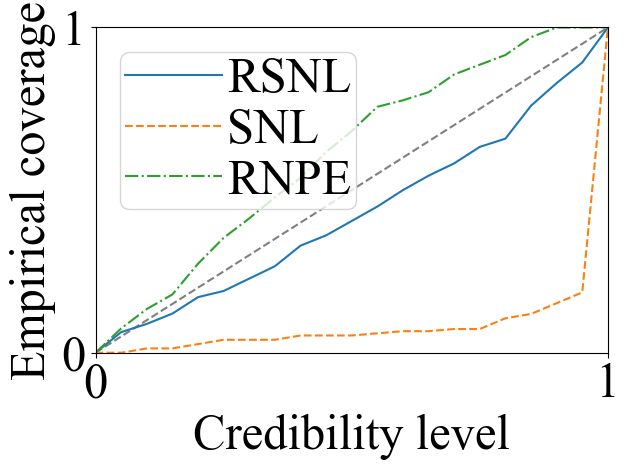

In [29]:
plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                        empirical_coverage_rnpe,
                        # title="Contaminated normal"
                        folder_name='contaminated_normal_'
                        )

sub_dir:  ../res/misspec_ma1/rsnl/seed_156
true_theta_pdf:  [1.34906747]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-4.8915153   1.3431052   1.3286495   1.3049177   1.2737261   1.2343801
  1.1821605   1.1309178   1.0804712   1.0235165   0.97087157  0.91854036
  0.8575323   0.7838629   0.69350404  0.57513964  0.41384283  0.22675306
 -0.03805355 -0.5895841  -4.8915153 ]
coverage:  [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
sub_dir:  ../res/misspec_ma1/rsnl/seed_169
true_theta_pdf:  [1.2229889]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-7.018181    1.2240052   1.2161406   1.20229     1.1832267   1.1626081
  1.1401212   1.1132452   1.0834855   1.0422163   0.99465185  0.9334224
  0.85016394  0.7515031   0.64184827  0.514234    0.36610165  0.15130198
 -0.11336084 -0.690

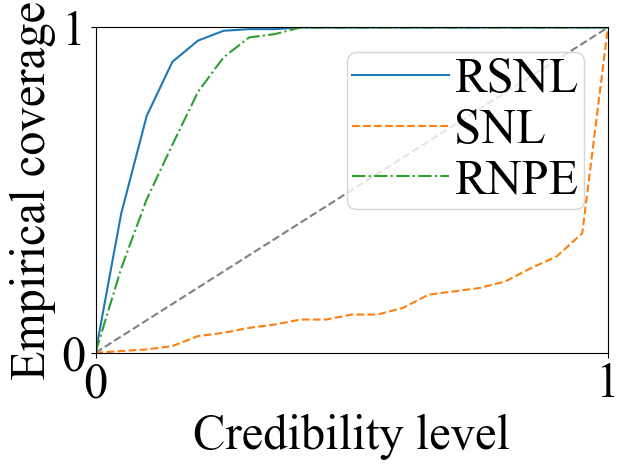

In [30]:
true_param = jnp.array([0.0])

directory = '../res/misspec_ma1/rsnl/'
empirical_coverage_rsnl = calculate_coverage(directory, true_param)

directory = '../res/misspec_ma1/snl/'
empirical_coverage_snl = calculate_coverage(directory, true_param)

directory = '../res_rnpe/misspec_ma1/'
empirical_coverage_rnpe = calculate_coverage_rnpe(directory, true_param)

plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                        empirical_coverage_rnpe,
                        folder_name='misspec_ma1_'
                        )

In [31]:
with open("../res_rnpe/misspec_ma1/seed_0/thetas.pkl", 'rb') as f:
    test_arr = pd.read_pickle(f)

sub_dir:  ../res/contaminated_slcp/rsnl/seed_156
true_theta_pdf:  [-3.14330299]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-26.849724   -2.9618855  -3.186856   -3.4205432  -3.574714   -3.6951869
  -3.8095877  -3.9192483  -4.0588555  -4.210075   -4.3379283  -4.5012355
  -4.709922   -4.9122725  -5.1495595  -5.459644   -5.8464203  -6.358812
  -6.953151   -7.9409633 -26.849724 ]
coverage:  [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
sub_dir:  ../res/contaminated_slcp/rsnl/seed_169
true_theta_pdf:  [-7.97692178]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-48.79102    -1.6548116  -1.8554788  -1.9592644  -2.0596013  -2.150457
  -2.2539415  -2.364326   -2.4991097  -2.6464827  -2.810761   -3.0077863
  -3.1934626  -3.4299657  -3.6724687  -3.9713228  -4.307247   -4.701853
  -5

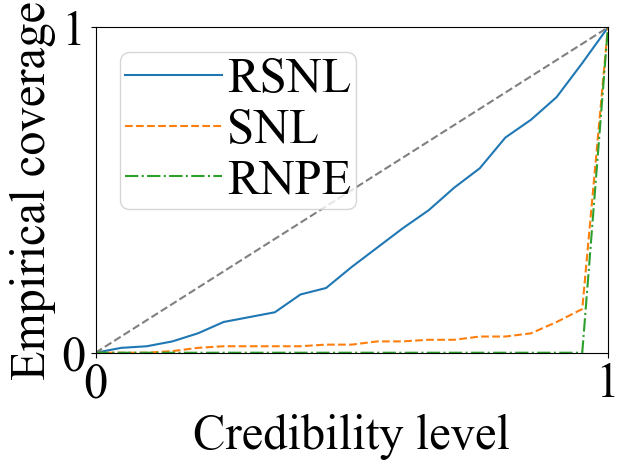

In [33]:
true_param = jnp.array([0.7, -2.9, -1.0, -0.9, 0.6])

directory = '../res/contaminated_slcp/rsnl/'
empirical_coverage_rsnl = calculate_coverage(directory, true_param, slcp=True)

directory = '../res/contaminated_slcp/snl/'
empirical_coverage_snl = calculate_coverage(directory, true_param, slcp=True)

directory = '../res_rnpe/contaminated_slcp/'
empirical_coverage_rnpe = calculate_coverage_rnpe(directory, true_param, slcp=True)

plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                        empirical_coverage_rnpe,
                        # title="Contaminated SLCP",
                        folder_name='contaminated_slcp_'
                        )

In [70]:
with open("../res_rnpe/contaminated_slcp/seed_0/thetas.pkl", 'rb') as f:
    test_arr = pd.read_pickle(f)

In [76]:
thetas.shape

(5, 1, 100000)

In [77]:
thetas = test_arr['posterior_samples']['NPE'].transpose()
print('thetas', thetas.shape)
thetas_kernel = jnp.squeeze(thetas)[:, ::100]  # THIN BY 10
print(thetas_kernel.shape)
# plt.hist(thetas_kernel, bins=30)
# plt.show()
thetas_kernel_eval = jnp.squeeze(thetas)[:, 1::100]  # THIN BY 10
kde = gaussian_kde(thetas_kernel, bw_method='silverman')
true_theta_pdf = kde.logpdf(true_param)
print('true_theta_pdf: ', true_theta_pdf)
theta_draws_pdf = kde.logpdf(thetas_kernel_eval)
theta_draws_pdf = jnp.sort(theta_draws_pdf)[::-1]
# test_xs = jnp.linspace(0.8, 1.2, 1000)


thetas (5, 1, 100000)
(5, 1000)
true_theta_pdf:  [-1.86024263e+11]


In [59]:
empirical_coverage_rnpe = calculate_coverage_rnpe(directory, true_param[::-1])

sub_dir:  ../res_rnpe/sir/seed_21
(2, 100)
true_theta_pdf:  [7.12089915]
N:  100
indices:  [-1  4  9 14 19 24 29 34 39 44 49 54 59 64 69 74 79 84 89 94 99]
theta_draws_pdf[indices]:  [1.1844741 7.3681254 7.3204107 7.2900753 7.2363887 7.1856756 7.1387734
 7.084262  6.9762564 6.9360657 6.830523  6.7852592 6.6893063 6.5141344
 6.362465  6.272564  6.0138245 5.676903  5.2579513 4.553008  1.1844741]
coverage:  [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
sub_dir:  ../res_rnpe/sir/seed_19
(2, 100)
true_theta_pdf:  [7.69406172]
N:  100
indices:  [-1  4  9 14 19 24 29 34 39 44 49 54 59 64 69 74 79 84 89 94 99]
theta_draws_pdf[indices]:  [-52.385303    7.7314796   7.6791396   7.648637    7.6210055   7.578466
   7.5328474   7.4577136   7.326126    7.261076    7.2188587   7.1566634
   7.1040115   6.979806    6.8249226   6.481771    6.4114485   5.905451
   4.9702034   3.1681473 -52.385303 ]
coverage:  [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
sub_dir:  ../res_rnpe/sir/seed_10
(2, 100)
true_theta_p

sub_dir:  ../res/sir/rsnl/seed_156
true_theta_pdf:  [7.57997207]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-3.8181806  8.140967   8.065838   7.984833   7.905901   7.8083515
  7.7129207  7.6172886  7.5293493  7.429985   7.321346   7.2249827
  7.098687   6.960667   6.809014   6.5914803  6.3535137  6.0643463
  5.617402   4.716801  -3.8181806]
coverage:  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
sub_dir:  ../res/sir/rsnl/seed_194
true_theta_pdf:  [10.33756445]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-112.229935    10.422003    10.349868    10.279508    10.21351
   10.134631    10.054462     9.963197     9.8761       9.779587
    9.669078     9.5652275    9.43775      9.289324     9.0863695
    8.848133     8.527757     8.120278     7.5092254    6.4211903
 -112.229

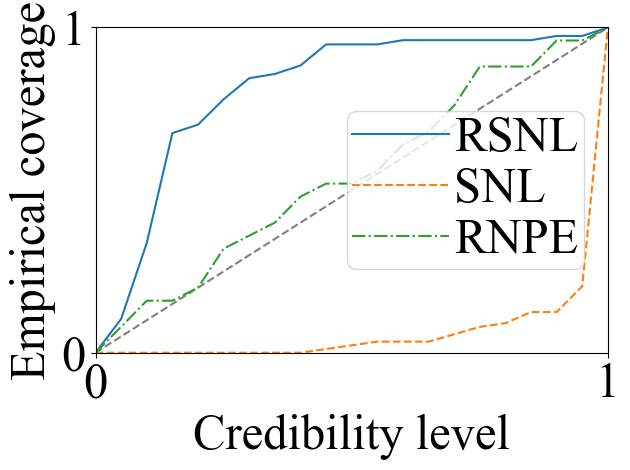

In [34]:
directory = '../res/sir/rsnl/'
true_param = jnp.array([.1, .15])
empirical_coverage_rsnl = calculate_coverage(directory, true_param)

directory = '../res/sir/snl/'
empirical_coverage_snl = calculate_coverage(directory, true_param)

directory = '../res_rnpe/sir/'
empirical_coverage_rnpe = calculate_coverage_rnpe(directory, true_param[::-1])

plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                        empirical_coverage_rnpe,
                        folder_name='sir_'
                        # title="SIR"
                        )

In [10]:
directory = "../res/contaminated_normal/rsnl_well_specified/"
true_param = jnp.array([1.0])
empirical_coverage_rsnl_well_specified = calculate_coverage(directory,
                                                            true_param)

directory = "../res/contaminated_normal/snl_well_specified/"
empirical_coverage_snl_well_specified = calculate_coverage(directory,
                                                           true_param)


sub_dir:  ../res/contaminated_normal/rsnl_well_specified/seed_156
No module named 'pandas.core.indexes.numeric'
sub_dir:  ../res/contaminated_normal/rsnl_well_specified/seed_151
No module named 'pandas.core.indexes.numeric'
sub_dir:  ../res/contaminated_normal/rsnl_well_specified/seed_167
No module named 'pandas.core.indexes.numeric'
sub_dir:  ../res/contaminated_normal/rsnl_well_specified/seed_193
No module named 'pandas.core.indexes.numeric'
sub_dir:  ../res/contaminated_normal/rsnl_well_specified/seed_158
No module named 'pandas.core.indexes.numeric'
sub_dir:  ../res/contaminated_normal/rsnl_well_specified/seed_194
No module named 'pandas.core.indexes.numeric'
sub_dir:  ../res/contaminated_normal/rsnl_well_specified/seed_160
No module named 'pandas.core.indexes.numeric'
sub_dir:  ../res/contaminated_normal/rsnl_well_specified/seed_134
No module named 'pandas.core.indexes.numeric'
sub_dir:  ../res/contaminated_normal/rsnl_well_specified/seed_133
No module named 'pandas.core.indexes.n

/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_50071/2714461678.py:46: RuntimeWarning: divide by zero encountered in divide
  total_coverage = total_coverage / count_successful
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_50071/2714461678.py:46: RuntimeWarning: invalid value encountered in divide
  total_coverage = total_coverage / count_successful


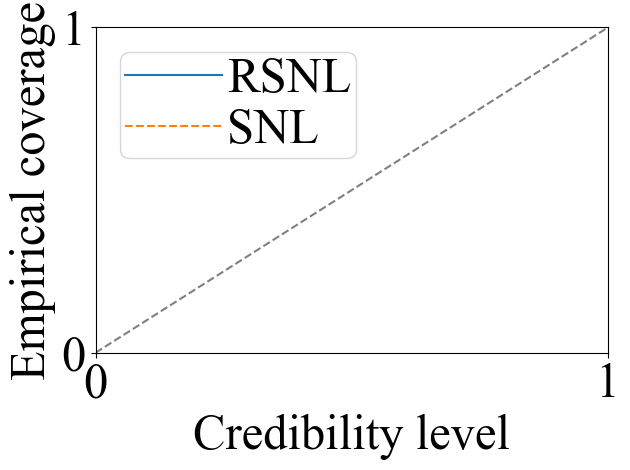

In [11]:
plot_and_save_coverages(empirical_coverage_rsnl_well_specified,
                        empirical_coverage_snl_well_specified,
                        folder_name='well_specified_normal_'
                        # title="SIR"
                        )
